In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_avalanche",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.7,
                      "num_val_benchmarks" : 3,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "EWC",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 1000,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                #"lr" : (5e-5, 2e-3),
                "num_epochs" : (3, 3),
                "ewc_lambda" : (400,400)
                #"lwf_alpha" : None, #(0.1, 0.9),
                #"lwf_temperature" : None} #(1, 3)
                }

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True,
                          "visualize_violin" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation

In [5]:
device = get_device(1)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-16 11:35:27,188] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1
defaultdict(<class 'dict'>, {})
-- >> Start of training phase << --
100%|██████████| 329/329 [00:05<00:00, 63.57it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3782
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8899
100%|██████████| 329/329 [00:04<00:00, 68.75it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1293
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9589
100%|██████████| 329/329 [00:04<00:00, 71.14it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1025
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9673
-- >> End of training phase << --


[I 2024-07-16 11:35:46,369] Trial 0 finished with value: 83.02893617021273 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 83.02893617021273.


defaultdict(<class 'dict'>, {})
-- >> Start of training phase << --
100%|██████████| 329/329 [00:04<00:00, 71.66it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3234
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9017
100%|██████████| 329/329 [00:04<00:00, 73.30it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1202
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9629
100%|██████████| 329/329 [00:04<00:00, 74.89it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0950
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9699
-- >> End of training phase << --


[I 2024-07-16 11:36:04,257] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2
defaultdict(<class 'dict'>, {})
-- >> Start of training phase << --
100%|██████████| 329/329 [00:04<00:00, 71.22it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3722
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8898
100%|██████████| 329/329 [00:04<00:00, 71.43it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1490
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9560
100%|██████████| 329/329 [00:04<00:00, 72.09it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1059
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9682
-- >> End of training phase << --


[I 2024-07-16 11:36:22,780] Trial 0 finished with value: 64.87840425531914 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 64.87840425531914.


defaultdict(<class 'dict'>, {})
-- >> Start of training phase << --
100%|██████████| 329/329 [00:04<00:00, 72.85it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3601
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8905
100%|██████████| 329/329 [00:04<00:00, 71.78it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1371
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9577
100%|██████████| 329/329 [00:04<00:00, 72.17it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1118
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9662
-- >> End of training phase << --


[I 2024-07-16 11:36:40,965] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3
defaultdict(<class 'dict'>, {})
-- >> Start of training phase << --
100%|██████████| 329/329 [00:04<00:00, 71.09it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3745
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8934
100%|██████████| 329/329 [00:04<00:00, 71.24it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1459
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9560
100%|██████████| 329/329 [00:04<00:00, 74.16it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1146
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9655
-- >> End of training phase << --


[I 2024-07-16 11:36:59,919] Trial 0 finished with value: 52.64846335697399 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 52.64846335697399.


defaultdict(<class 'dict'>, {})
-- >> Start of training phase << --
100%|██████████| 329/329 [00:04<00:00, 74.52it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3693
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8944
100%|██████████| 329/329 [00:04<00:00, 75.09it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1471
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9559
100%|██████████| 329/329 [00:04<00:00, 75.21it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1075
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9675
-- >> End of training phase << --


## Visualize results

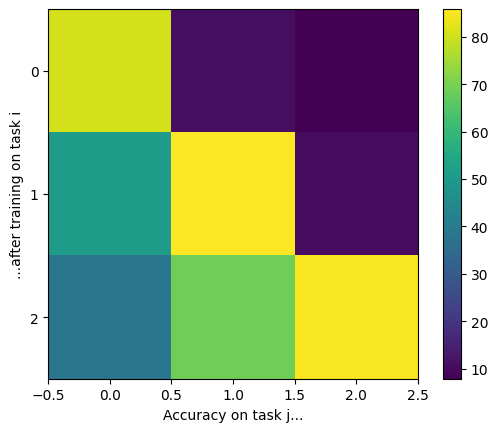

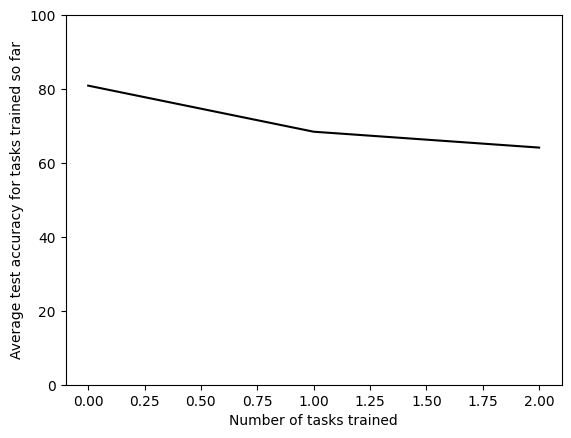

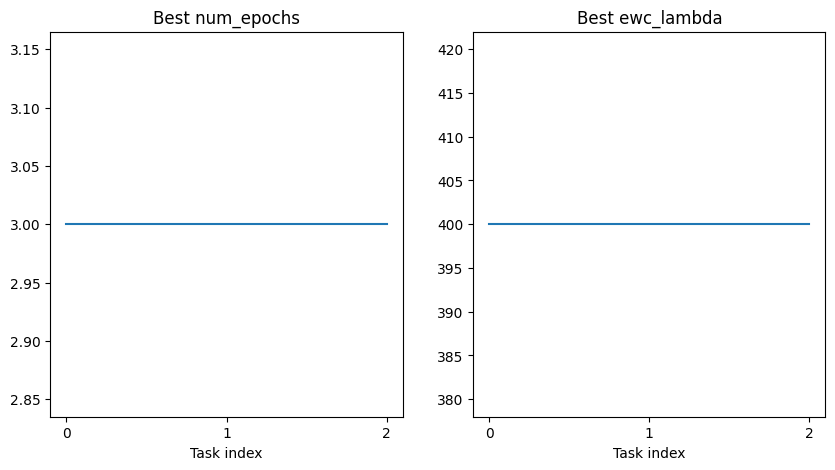

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1
defaultdict(<class 'dict'>, {})
-- >> Start of training phase << --
0it [00:00, ?it/s]

100%|██████████| 329/329 [00:04<00:00, 71.18it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4164
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8797
100%|██████████| 329/329 [00:04<00:00, 73.58it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1238
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9616
100%|██████████| 329/329 [00:04<00:00, 72.46it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0971
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9687
-- >> End of training phase << --

--------------------------------------------------
LEARNING TASK 2
defaultdict(<class 'dict'>, {})
-- >> Start of training phase << --
100%|██████████| 329/329 [00:04<00:00, 72.26it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3595
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8916
100%|██████████| 329/329 [00:04<00:00, 72.26it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1404
	To

## Visualize validation

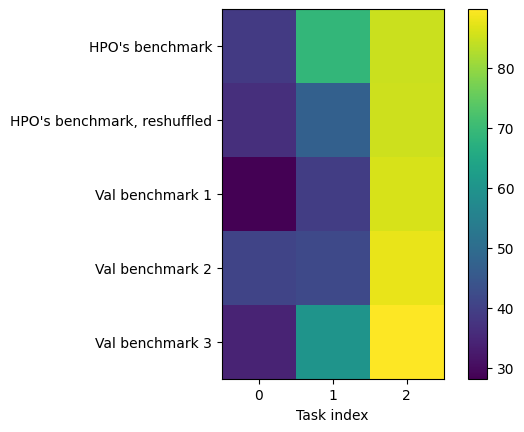

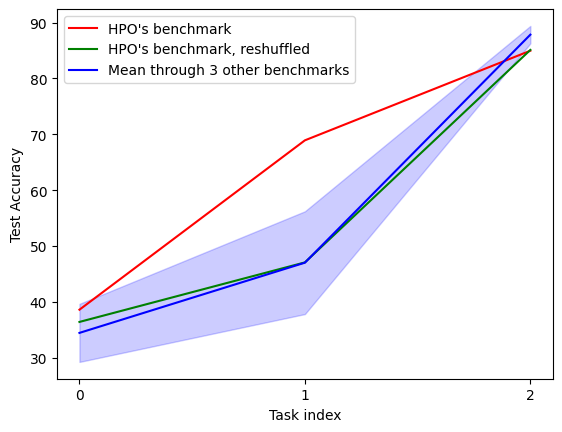

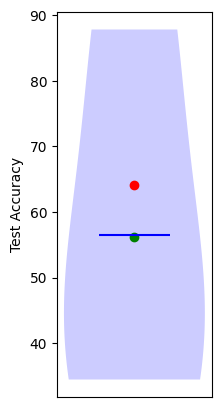

In [10]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [11]:
if save_results :
    np.savetxt('Results/test_accs_matrix.csv', test_accs_matrix)
    np.savetxt('Results/val_accs_matrix.csv', val_accs_matrix)